<a href="https://colab.research.google.com/github/Mayank-004/VC-Industry-Predictive-analysis/blob/main/VC_Target_POSTVALUATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

## Importing the libraries

In [259]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn


## Importing the dataset







In [260]:
url1 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VC_Exits.csv'
dataset1 = pd.read_csv(url1, error_bad_lines=False)

#url2 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCExit2.csv'
#dataset2 = pd.read_csv(url2, error_bad_lines=False)

url3 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCData2.csv'
dataset3 = pd.read_csv(url3, error_bad_lines=False)

dataset = pd.merge(dataset1,dataset3,left_on=["Company PBID"],right_on=["Company ID"])



dataset


,Company PBID,Exit Date,Exit Size (millions),Pre Value (millions),Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,Total Preferred Capital Raised ($M)*,% Preferred Capital Raised*,Total Preferred Capital Raised ($M) - Combination**,% Preferred Capital Raised - Combination**,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,CEO Education,Deal No.,Deal ID.1,Announced Date,Deal Date,Deal Size,Deal Size Status,Pre-money Valuation,...,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Revenue Growth since last debt deal,Gross Profit,Net Income,EBITDA,EBIT,Total Debt (from financials),Fiscal Year,Valuation/EBITDA,Valuation/EBIT,Valuation/Net Income,Valuation/Revenue,Valuation/Cash Flow,Deal Size/EBITDA,Deal Size/EBIT,Deal Size/Net Income,Deal Size/Revenue,Deal Size/Cash Flow,Debt/EBITDA,Debt/Equity,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,EBITDA Margin %,Current Employees,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company State/Province,Company Post Code,Company Country,Year Founded
0,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,67911-49T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",1,67911-49T,NaN,01-Jan-2015,0.33,Actual,NaN,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0
1,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,122433-04T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",2,122433-04T,NaN,26-May-2015,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0
2,160695-55,1/13/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,$0.70,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Software Development Applications,"SaaS, TMT, CloudTech & DevOps",Tel Aviv,NaN,Israel,71323-57T,160695-55,Information Technology,Software,Software Development Applications,"Application Software, Software Development App...","CloudTech & DevOps, SaaS, TMT","a/b testing, application development, applicat...",Formerly VC-backed,Generating Revenue,Venture Capital,56786-14P,"BA (Bachelor of Arts), 2005, Business & Marketing",1,71323-57T,NaN,18-Mar-2016,0.70,Actual,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,US Dollars (USD),"Tel Aviv, Israel",Middle East,Middle East,Tel Aviv,NaN,NaN,Israel,2015.0
3,81857-08,3/18/19,$166.00,NaN,$166.00,Merger/Acquisition,Early Stage VC,$10.10,NaN,NaN,NaN,NaN,16.44x,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,46035

In [261]:
dataset.describe()

,Deal No.,Deal Size,Total Invested Equity,Debt Type 3,Debt Amount 1,Debt Amount 2,Debt Amount 3,Debt Raised in Round,Contingent Payout,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Total Debt (from financials),Fiscal Year,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,Year Founded
count,305.000000,244.000000,229.000000,0.0,12.000000,1.0,0.0,12.000000,0.0,267.000000,246.000000,140.000000,0.0,81.000000,37.000000,91.000000,0.0,0.0,0.0,0.0,0.0,300.000000
mean,4.072131,38.641844,39.056201,NaN,23.090833,5.0,NaN,23.507500,NaN,3.883895,2.605691,2.792857,NaN,98.809877,22.639730,2016.274725,NaN,NaN,NaN,NaN,NaN,2011.023333
std,2.399570,84.661816,83.502049,NaN,57.814106,NaN,NaN,57.666114,NaN,3.423383,2.421630,1.867929,NaN,161.597687,64.688232,1.686982,NaN,NaN,NaN,NaN,NaN,3.928643
min,1.000000,0.030000,0.020000,NaN,0.040000,5.0,NaN,0.040000,NaN,1.000000,1.000000,1.000000,NaN,0.020000,0.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,1997.000000
25%,2.000000,2.000000,2.500000,NaN,0.212500,5.0,NaN,0.212500,NaN,1.000000,1.000000,1.000000,NaN,6.730000,0.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,2009.000000
50%,4.000000,8.400000,10.000000,NaN,1.500000,5.0,NaN,2.090000,NaN,3.000000,2.000000,2.000000,NaN,32.460000,0.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,2012.000000
75%,5.000000,30.775000,31.000000,NaN,6.250000,5.0,NaN,7.750000,NaN,5.000000,3.000000,4.000000,NaN,100.000000,5.020000,2018.000000,NaN,NaN,NaN,NaN,NaN,2014.000000
max,14.000000,720.000000,720.000000,NaN,200.000000,5.0,NaN,200.000000,NaN,22.000000,16.000000,8.000000,NaN,844.800000,257.200000,2021.000000,NaN,NaN,NaN,NaN,NaN,2017.000000


Target Column

In [262]:
dataset['Post Value (millions)']

0            NaN
1            NaN
2            NaN
3        $166.00
4            NaN
         ...    
300          NaN
301          NaN
302      $247.25
303    $9,229.98
304    $9,229.98
Name: Post Value (millions), Length: 305, dtype: object

replacing $,',' values

In [263]:
# target column MOIC is derived by Exit Size divided by Total VC capital raised
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace("$","") # removing $ from Total VC capital
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace(",","") # removing "," from Total VC capital
dataset.loc[:,'Total VC Capital Raised ($M)***'] = dataset.loc[:,'Total VC Capital Raised ($M)***'].astype(float) # converting Total VC capital to float from string
dataset['Total VC Capital Raised ($M)***']
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace("$","") # removing $ from Exit Size
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace(",","") # removing "," from Exit Size
dataset.loc[:,'Exit Size (millions)'] = dataset.loc[:,'Exit Size (millions)'].astype(float) # converting Total VC capital to float from string

dataset['Post Value (millions)']= dataset['Post Value (millions)'].str.replace("$","") # removing $ from MOIC

dataset['Post Value (millions)']= dataset['Post Value (millions)'].str.replace("x","") # removing $ from MOIC
dataset['Post Value (millions)']= dataset['Post Value (millions)'].str.replace(",","") # removing ',' from MOIC
dataset.loc[:,'Post Value (millions)'] = dataset.loc[:,'Post Value (millions)'].astype(float) # converting MOIC to float from string


In [264]:
dataset['Post Value (millions)'].count()

160

In [265]:
dataset['Post Value (millions)'].isna().sum()

145

In [266]:
dataset.dropna(subset = ["Post Value (millions)"], inplace=True) # Drop rows with no values from Target column

In [267]:
dataset.count()

Company PBID              160
Exit Date                 160
Exit Size (millions)      153
Pre Value (millions)       55
Post Value (millions)     160
                         ... 
Company City              160
Company State/Province    129
Company Post Code         141
Company Country           160
Year Founded              158
Length: 105, dtype: int64

In [268]:
# check missing value in df
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
Implied EV/EBITDA,160,100.000
Implied EV,160,100.000
Implied EV/EBIT,160,100.000
Implied EV/Net Income,160,100.000
Implied EV/Revenue,160,100.000
...,...,...
Raised to Date,10,6.250
Exit Size (millions),7,4.375
Total VC Capital Raised ($M)***,6,3.750
CEO PBId,5,3.125


Drop Column which has missing values more than 30%

In [269]:


dataset=dataset.drop(columns=[
'Deal Type',
'Implied EV/Cash Flow',
'Implied EV/Revenue',
'Implied EV/Net Income',
'Implied EV/EBITDA',
'Debt/EBITDA',
'Debt Type',
'Debt/Equity',
'Debt Type',
'Debt Amount 1',
'Valuation/Cash Flow',
'Valuation/EBITDA',
'Valuation/EBIT',
'Deal Size/Cash Flow',
'Valuation/Net Income',
'EBITDA Margin %',
'Gross Profit',
'Deal Size/EBITDA',
'Deal Size/EBIT',
'EBITDA',
'Total Debt (from financials)',
'Net Income',
'Deal Size/Net Income',
'EBIT',
'Revenue Growth since last debt deal',
'Valuation/Revenue',
'Pre Value (millions)',
'Deal Size/Revenue',
'Revenue',
'Price per Share',
'# Follow-on Investors',
'% Acquired',
'Employees',
'Pre-money Valuation',
'Total Preferred Capital Raised ($M) - Combination**',
'% Preferred Capital Raised - Combination**',
'% Preferred Capital Raised*',
'Total Preferred Capital Raised ($M)*',
'Deal Type 3',
'Debt Type 3',
'Debt Type 2'	,
'Debt Amount 3',
'Implied EV/EBIT',
'Implied EV',
'Contingent Payout',
'Debt Amount 2',
'Debt Raised in Round',
'Announced Date',
'Fiscal Year',
'VC Round Up/Down/Flat',
'Post Valuation',
'Post Valuation Status',
'Series',
])


In [270]:
dataset

,Company PBID,Exit Date,Exit Size (millions),Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,CEO Education,Deal No.,Deal ID.1,Deal Date,Deal Size,Deal Size Status,Raised to Date,VC Round,Deal Type 2,Deal Class,Total Invested Equity,Deal Status,Business Status,Financing Status,# Investors,# New Investors,Current Employees,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company State/Province,Company Post Code,Company Country,Year Founded
3,81857-08,3/18/19,166.00,166.00,Merger/Acquisition,Early Stage VC,10.10,16.44x,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,46035-10T,81857-08,Information Technology,Software,Business/Productivity Software,"Business/Productivity Software*, Social/Platfo...","CloudTech & DevOps, SaaS","agile management, data sync, enterprise softwa...",Formerly VC-backed,Generating Revenue,Venture Capital,93804-31P,"BS (Bachelor of Science), 1996, Computer Scien...",1,46035-10T,19-Feb-2015,10.10,Actual,10.10,1st Round,NaN,Venture Capital,10.10,Completed,Generating Revenue,Venture Capital-Backed,1.0,1.0,6,US Dollars (USD),"Georgetown, TX",Americas,North America,Georgetown,Texas,78626,United States,2013.0
7,179890-84,8/23/18,14.10,14.10,Merger/Acquisition,Early Stage VC,NaN,NaN,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,86566-96T,179890-84,Information Technology,Software,Application Software,"Application Software*, Other Services (B2C Non...","Big Data, CloudTech & DevOps, Industrials, Int...","alerts service, cellular technology, data anal...",Formerly VC-backed,Generating Revenue,Venture Capital,161469-37P,"University of Waterloo, Bachelor's, Physics; W...",1,86566-96T,24-Jun-2015,0.07,Actual,0.07,NaN,NaN,Other,0.07,Completed,Generating Revenue,Accelerator/Incubator Backed,1.0,1.0,18,US Dollars (USD),"Kitchener, Canada",Americas,North America,Kitchener,Ontario,N2G 1V9,Canada,2015.0
8,179890-84,8/23/18,14.10,14.10,Merger/Acquisition,Early Stage VC,NaN,NaN,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,86567-86T,179890-84,Information Technology,Software,Application Software,"Application Software*, Other Services (B2C Non...","Big Data, CloudTech & DevOps, Industrials, Int...","alerts service, cellular technology, data anal...",Formerly VC-backed,Generating Revenue,Venture Capital,161469-37P,"University of Waterloo, Bachelor's, Physics; W...",2,86567-86T,17-Aug-2016,NaN,NaN,0.07,NaN,NaN,Other,NaN,Completed,Generating Revenue,Accelerator/Incubator Backed,1.0,1.0,18,US Dollars (USD),"Kitchener, Canada",Americas,North America,Kitchener,Ontario,N2G 1V9,Canada,2015.0
9,179890-84,8/23/18,14.10,14.10,Merger/Acquisition,Early Stage VC,NaN,NaN,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,86568-58T,179890-84,Information Technology,Software,Application Software,"Application Software*, Other Services (B2C Non...","Big Data, CloudTech & DevOps, Industrials, Int...","alerts service, cellular technology, data anal...",Formerly VC-backed,Generating Revenue,Venture Capital,161469-37P,"University of Waterloo, Bachelor's, Physics; W...",3,86568-58T,23-Nov-2016,0.10,Actual,0.17,NaN,NaN,Other,0.10,Completed,Generating Revenue,Accelerator/Incubator Backed,1.0,1.0,18,US Dollars (USD),"Kitchener, Canada",Americas,North America,Kitchener,Ontario,N2G 1V9,Canada,2015.0
10,179890-84,8/23/18,14.10,14.10,Merger/Acquisition,Early Stage VC,NaN,NaN,Information Technology,Software,App

In [271]:
# Drop duplicate columns  

dataset=dataset.drop(columns=['Deal ID','Company ID','Primary Industry Sector','Primary Industry Group','Primary Industry Code','All Industries','Verticals_y','HQ Location','HQ Global Region','HQ Global Sub Region','Company City',	'Company State/Province',	'Company Post Code',	'Company Country'])




In [272]:
# Drop Column intuitively which may not have significant impact
dataset=dataset.drop(columns=['MOIC','Company PBID','Exit Date','Exit Size (millions)','Total VC Capital Raised ($M)***','Keywords','Deal No.','Deal ID.1','Deal Date','Deal Size Status','Deal Type 2','Deal Class','Deal Status','CEO PBId'])





In [273]:
dataset

,Post Value (millions),Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,# New Investors,Current Employees,Native Currency of Deal,Year Founded
3,166.00,Merger/Acquisition,Early Stage VC,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10,10.10,1st Round,10.10,Generating Revenue,Venture Capital-Backed,1.0,1.0,6,US Dollars (USD),2013.0
7,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",0.07,0.07,NaN,0.07,Generating Revenue,Accelerator/Incubator Backed,1.0,1.0,18,US Dollars (USD),2015.0
8,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",NaN,0.07,NaN,NaN,Generating Revenue,Accelerator/Incubator Backed,1.0,1.0,18,US Dollars (USD),2015.0
9,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",0.10,0.17,NaN,0.10,Generating Revenue,Accelerator/Incubator Backed,1.0,1.0,18,US Dollars (USD),2015.0
10,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",NaN,0.17,1st Round,NaN,Generating Revenue,Venture Capital-Backed,4.0,4.0,18,US Dollars (USD),2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,40.00,Merger/Acquisition,Series F,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Columbia University, JD (Doctor of Law), 1992;...",12.13,165.10,9th Round,12.13,Generating Revenue,Venture Capital-Backed,NaN,NaN,NaN,US Dollars (USD),2005.0
298,40.00,Merger/Acquisition,Series F,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Bar-Ilan University, Bachelor's, 2000, Law",51.35,139.00,8th Round,51.35,Generating Revenue,Venture Capital-Backed,13.0,5.0,NaN,US Dollars (USD),2005.0
302,247.25,IPO,Corporate,Information Technology,Computer Hardware,"Computers, Parts and Peripherals","Manufacturing, TMT, CloudTech & DevOps",Beijing,NaN,China,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",NaN,67.53,67.53,1st Round,67.53,Profitable,Venture Capital-Backed,2.0,2.0,801,Chinese Yuan RMB (CNY),2008.0
303,9229.98,IPO,Series D,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",NaN,114.97,160.75,5th Round,114.97,Generating Revenue,Venture Capital-Backed,8.0,4.0,"3,871",US Dollars (USD),2011.0


In [274]:
# calculating total working duration of company


from datetime import date 
todays_date = date.today() 

ts =todays_date.year

dataset['Total duration for Company'] = ts - dataset['Year Founded']

dataset=dataset.drop(columns=['Year Founded'])

dataset['Total duration for Company'] 

3       8.0
7       6.0
8       6.0
9       6.0
10      6.0
       ... 
297    16.0
298    16.0
302    13.0
303    10.0
304    10.0
Name: Total duration for Company, Length: 160, dtype: float64

In [275]:
dataset

,Post Value (millions),Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,# New Investors,Current Employees,Native Currency of Deal,Total duration for Company
3,166.00,Merger/Acquisition,Early Stage VC,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10,10.10,1st Round,10.10,Generating Revenue,Venture Capital-Backed,1.0,1.0,6,US Dollars (USD),8.0
7,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",0.07,0.07,NaN,0.07,Generating Revenue,Accelerator/Incubator Backed,1.0,1.0,18,US Dollars (USD),6.0
8,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",NaN,0.07,NaN,NaN,Generating Revenue,Accelerator/Incubator Backed,1.0,1.0,18,US Dollars (USD),6.0
9,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",0.10,0.17,NaN,0.10,Generating Revenue,Accelerator/Incubator Backed,1.0,1.0,18,US Dollars (USD),6.0
10,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",NaN,0.17,1st Round,NaN,Generating Revenue,Venture Capital-Backed,4.0,4.0,18,US Dollars (USD),6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,40.00,Merger/Acquisition,Series F,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Columbia University, JD (Doctor of Law), 1992;...",12.13,165.10,9th Round,12.13,Generating Revenue,Venture Capital-Backed,NaN,NaN,NaN,US Dollars (USD),16.0
298,40.00,Merger/Acquisition,Series F,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Bar-Ilan University, Bachelor's, 2000, Law",51.35,139.00,8th Round,51.35,Generating Revenue,Venture Capital-Backed,13.0,5.0,NaN,US Dollars (USD),16.0
302,247.25,IPO,Corporate,Information Technology,Computer Hardware,"Computers, Parts and Peripherals","Manufacturing, TMT, CloudTech & DevOps",Beijing,NaN,China,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",NaN,67.53,67.53,1st Round,67.53,Profitable,Venture Capital-Backed,2.0,2.0,801,Chinese Yuan RMB (CNY),13.0
303,9229.98,IPO,Series D,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",NaN,114.97,160.75,5th Round,114.97,Generating Revenue,Venture Capital-Backed,8.0,4.0,"3,871",US Dollars (USD),10.0


In [276]:
# adding investors and new investors column together

dataset['# Investors']= dataset['# Investors']+dataset['# New Investors']
dataset=dataset.drop(columns=['# New Investors'])

In [277]:
dataset['# Investors']

3       2.0
7       2.0
8       2.0
9       2.0
10      8.0
       ... 
297     NaN
298    18.0
302     4.0
303    12.0
304    14.0
Name: # Investors, Length: 160, dtype: float64

In [278]:
dataset

,Post Value (millions),Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Native Currency of Deal,Total duration for Company
3,166.00,Merger/Acquisition,Early Stage VC,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10,10.10,1st Round,10.10,Generating Revenue,Venture Capital-Backed,2.0,6,US Dollars (USD),8.0
7,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",0.07,0.07,NaN,0.07,Generating Revenue,Accelerator/Incubator Backed,2.0,18,US Dollars (USD),6.0
8,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",NaN,0.07,NaN,NaN,Generating Revenue,Accelerator/Incubator Backed,2.0,18,US Dollars (USD),6.0
9,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",0.10,0.17,NaN,0.10,Generating Revenue,Accelerator/Incubator Backed,2.0,18,US Dollars (USD),6.0
10,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",NaN,0.17,1st Round,NaN,Generating Revenue,Venture Capital-Backed,8.0,18,US Dollars (USD),6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,40.00,Merger/Acquisition,Series F,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Columbia University, JD (Doctor of Law), 1992;...",12.13,165.10,9th Round,12.13,Generating Revenue,Venture Capital-Backed,NaN,NaN,US Dollars (USD),16.0
298,40.00,Merger/Acquisition,Series F,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Bar-Ilan University, Bachelor's, 2000, Law",51.35,139.00,8th Round,51.35,Generating Revenue,Venture Capital-Backed,18.0,NaN,US Dollars (USD),16.0
302,247.25,IPO,Corporate,Information Technology,Computer Hardware,"Computers, Parts and Peripherals","Manufacturing, TMT, CloudTech & DevOps",Beijing,NaN,China,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",NaN,67.53,67.53,1st Round,67.53,Profitable,Venture Capital-Backed,4.0,801,Chinese Yuan RMB (CNY),13.0
303,9229.98,IPO,Series D,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",NaN,114.97,160.75,5th Round,114.97,Generating Revenue,Venture Capital-Backed,12.0,"3,871",US Dollars (USD),10.0


**Cleaning column Values to Numerical only ( removing $,x)**

## Filling Missing Values

In [279]:
# check missing value in df
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
State,36,22.500
Total Invested Equity,34,21.250
CEO Education,33,20.625
# Investors,29,18.125
Deal Size,29,18.125
Current Employees,20,12.500
VC Round,16,10.000
Raised to Date,10,6.250
Total duration for Company,2,1.250


In [280]:
# filling dataset missing values in columns State, CEO Education and VC round
dataset= dataset.fillna({
'State' : 'NOT IN USA' ,
'CEO Education': 'No Known Education',
'VC Round' : 'not known'
})


In [281]:
# filling Investors missing value by mean of other row values
dataset['# Investors'] = dataset['# Investors'].fillna((dataset['# Investors'].mean()))


In [282]:
# filling missing values in Raised to date column with mean 

dataset['Raised to Date']= dataset['Raised to Date'].str.replace(",","")

dataset.loc[:,'Raised to Date'] = dataset.loc[:,'Raised to Date'].astype(float)

dataset['Raised to Date'] = dataset['Raised to Date'].fillna((dataset['Raised to Date'].mean()))


In [283]:
# filling missing values in Total duration for Company column with mean 

dataset['Total duration for Company'] = dataset['Total duration for Company'].fillna((dataset['Total duration for Company'].mean()))

In [284]:
# filling missing values in Raised to date column with mean 

dataset['Current Employees']= dataset['Current Employees'].str.replace(",","")
dataset.loc[:,'Current Employees'] = dataset.loc[:,'Current Employees'].astype(float)

dataset['Current Employees'] = dataset['Current Employees'].fillna((dataset['Current Employees'].mean()))

In [285]:
# filling missing values in all other columns with mean 

dataset = dataset.fillna((dataset.mean()))


In [286]:
dataset['VC Round']

3      1st Round
7      not known
8      not known
9      not known
10     1st Round
         ...    
297    9th Round
298    8th Round
302    1st Round
303    5th Round
304    4th Round
Name: VC Round, Length: 160, dtype: object

## Encoding categorical data

### Encoding the Independent Variable as One hot Encoder

Label Encoding of Categorical Variable

In [287]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()


dataset[['Exit Type_LE']] = le.fit_transform(dataset[['Exit Type']])

dataset[['Last VC Deal Type_LE']] = le.fit_transform(dataset[['Last VC Deal Type']])

dataset[['Industry Sector_LE']] = le.fit_transform(dataset[['Industry Sector']])

dataset[['Industry Group_LE']] = le.fit_transform(dataset[['Industry Group']])

dataset[['Industry Code_LE']] = le.fit_transform(dataset[['Industry Code']])

dataset[['Verticals_LE']] = le.fit_transform(dataset[['Verticals_x']])

dataset[['City_LE']] = le.fit_transform(dataset[['City']])

dataset[['State_LE']] = le.fit_transform(dataset[['State']])

dataset[['Country_LE']] = le.fit_transform(dataset[['Country']])

dataset[['Current Financing Status_LE']] = le.fit_transform(dataset[['Current Financing Status']])
dataset[['Current Business Status_LE']] = le.fit_transform(dataset[['Current Business Status']])
dataset[['Universe_LE']] = le.fit_transform(dataset[['Universe']])
dataset[['CEO Education_LE']] = le.fit_transform(dataset[['CEO Education']])
dataset[['VC Round_LE']] = le.fit_transform(dataset[['VC Round']])
dataset[['Business Status']] = le.fit_transform(dataset[['Business Status']])
dataset[['Financing Status']] = le.fit_transform(dataset[['Financing Status']])
dataset[['Native Currency of Deal_LE']] = le.fit_transform(dataset[['Native Currency of Deal']])

dataset

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Post Value (millions),Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Native Currency of Deal,Total duration for Company,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE,Native Currency of Deal_LE
3,166.00,Merger/Acquisition,Early Stage VC,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10000,10.10,1st Round,10.100000,0,4,2.000000,6.000000,US Dollars (USD),8.0,2,1,1,4,2,20,13,12,9,0,0,10,5,2,5
7,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",0.07000,0.07,not known,0.070000,0,0,2.000000,18.000000,US Dollars (USD),6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,12,5
8,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",61.76626,0.07,not known,60.941349,0,0,2.000000,18.000000,US Dollars (USD),6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,12,5
9,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",0.10000,0.17,not known,0.100000,0,0,2.000000,18.000000,US Dollars (USD),6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,12,5
10,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",61.76626,0.17,1st Round,60.941349,0,4,8.000000,18.000000,US Dollars (USD),6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,40.00,Merger/Acquisition,Series F,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Columbia University, JD (Doctor of Law), 1992;...",12.13000,165.10,9th Round,12.130000,0,4,7.633588,909.885714,US Dollars (USD),16.0,2,12,1,4,3,28,15,7,9,0,0,4,16,10,5
298,40.00,Merger/Acquisition,Series F,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Bar-Ilan University, Bachelor's, 2000, Law",51.35000,139.00,8th Round,51.350000,0,4,18.000000,909.885714,US Dollars (USD),16.0,2,12,1,4,3,28,15,7,9,0,0,4,8,9,5
302,247.25,IPO,Corporate,Information Technology,Computer Hardware,"Computers, Parts and Peripherals","Manufacturing, TMT, CloudTech & DevOps",Beijing,NOT IN USA,China,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",No Known Education,67.53000,67.53,1st Round,67.530000,3,4,4.000000,801.000000,Chinese Yuan RMB (CNY),13.0,1,0,1,0,4,10,2,6,3,0,2,9,35,2,1
303,9229.98,IPO,Series D,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech

In [288]:
# removing original columns after label encoding



dataset=dataset.drop(columns=['State','Exit Type','Last VC Deal Type','Industry Sector','Industry Group','Industry Code','Verticals_x','City','State','Country'])

dataset=dataset.drop(columns=['Current Financing Status','Current Business Status','Universe','CEO Education','VC Round','Business Status','Financing Status','Native Currency of Deal'])			  	 


dataset

,Post Value (millions),Deal Size,Raised to Date,Total Invested Equity,# Investors,Current Employees,Total duration for Company,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE,Native Currency of Deal_LE
3,166.00,10.10000,10.10,10.100000,2.000000,6.000000,8.0,2,1,1,4,2,20,13,12,9,0,0,10,5,2,5
7,14.10,0.07000,0.07,0.070000,2.000000,18.000000,6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,12,5
8,14.10,61.76626,0.07,60.941349,2.000000,18.000000,6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,12,5
9,14.10,0.10000,0.17,0.100000,2.000000,18.000000,6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,12,5
10,14.10,61.76626,0.17,60.941349,8.000000,18.000000,6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,40.00,12.13000,165.10,12.130000,7.633588,909.885714,16.0,2,12,1,4,3,28,15,7,9,0,0,4,16,10,5
298,40.00,51.35000,139.00,51.350000,18.000000,909.885714,16.0,2,12,1,4,3,28,15,7,9,0,0,4,8,9,5
302,247.25,67.53000,67.53,67.530000,4.000000,801.000000,13.0,1,0,1,0,4,10,2,6,3,0,2,9,35,2,1
303,9229.98,114.97000,160.75,114.970000,12.000000,3871.000000,10.0,1,9,1,4,3,26,24,0,9,0,2,9,35,6,5


Changing Data type of Column to perform correlation matrix

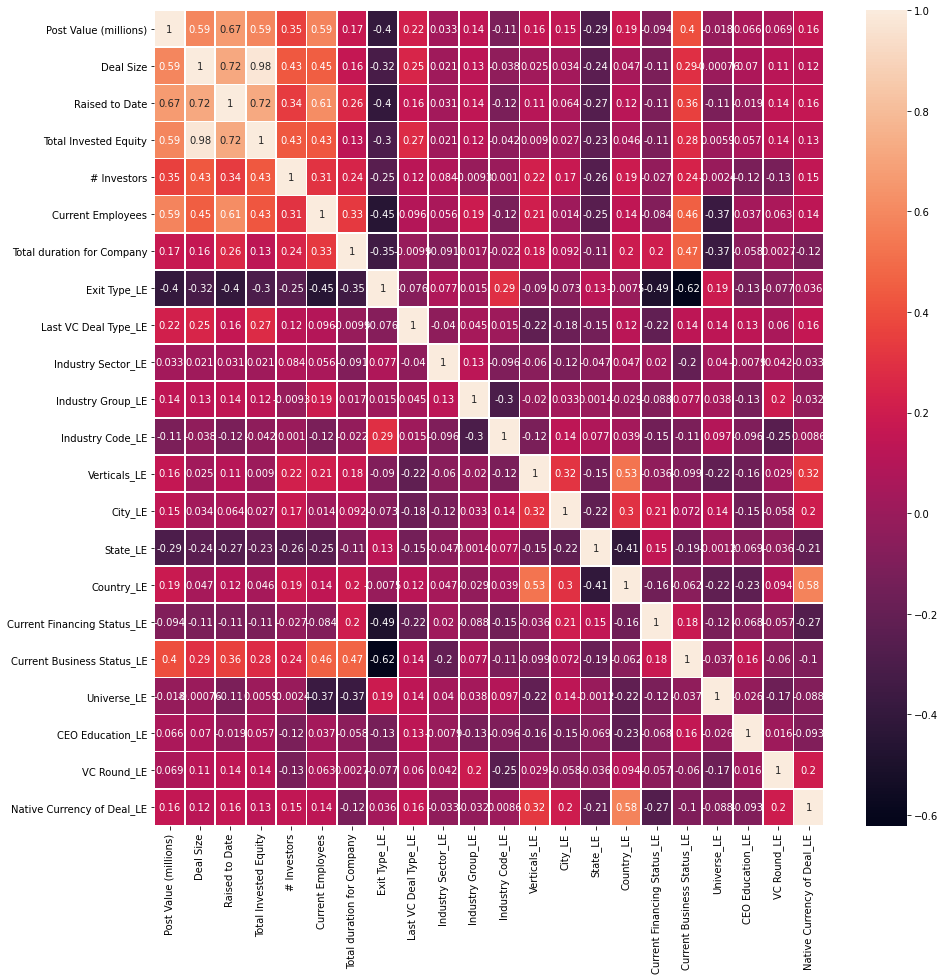

In [289]:

corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

Drop Column with high correlation with other columns

In [290]:
dataset=dataset.drop(columns=['Deal Size'])

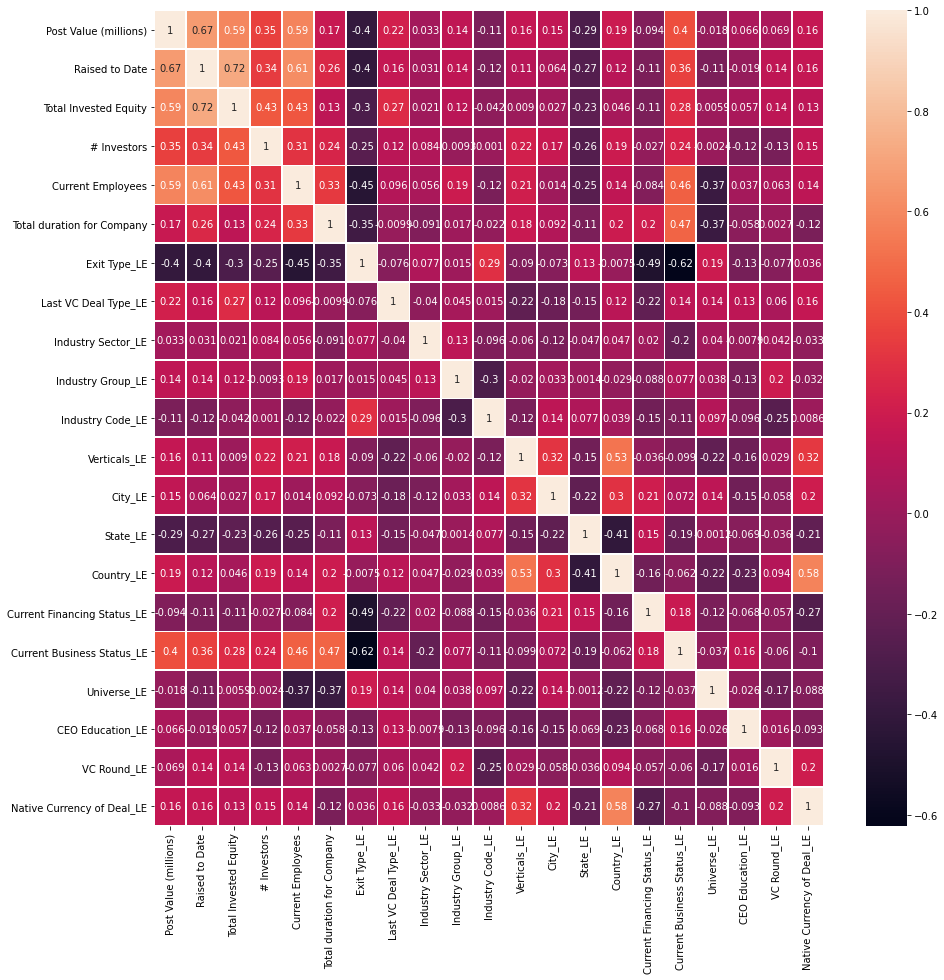

In [291]:
corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

In [292]:
dataset

,Post Value (millions),Raised to Date,Total Invested Equity,# Investors,Current Employees,Total duration for Company,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE,Native Currency of Deal_LE
3,166.00,10.10,10.100000,2.000000,6.000000,8.0,2,1,1,4,2,20,13,12,9,0,0,10,5,2,5
7,14.10,0.07,0.070000,2.000000,18.000000,6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,12,5
8,14.10,0.07,60.941349,2.000000,18.000000,6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,12,5
9,14.10,0.17,0.100000,2.000000,18.000000,6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,12,5
10,14.10,0.17,60.941349,8.000000,18.000000,6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,40.00,165.10,12.130000,7.633588,909.885714,16.0,2,12,1,4,3,28,15,7,9,0,0,4,16,10,5
298,40.00,139.00,51.350000,18.000000,909.885714,16.0,2,12,1,4,3,28,15,7,9,0,0,4,8,9,5
302,247.25,67.53,67.530000,4.000000,801.000000,13.0,1,0,1,0,4,10,2,6,3,0,2,9,35,2,1
303,9229.98,160.75,114.970000,12.000000,3871.000000,10.0,1,9,1,4,3,26,24,0,9,0,2,9,35,6,5


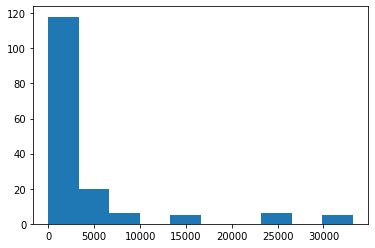

In [293]:
# histogram plot
from matplotlib import pyplot

pyplot.hist(dataset['Post Value (millions)'])
pyplot.show()

In [294]:
dataset

,Post Value (millions),Raised to Date,Total Invested Equity,# Investors,Current Employees,Total duration for Company,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE,Native Currency of Deal_LE
3,166.00,10.10,10.100000,2.000000,6.000000,8.0,2,1,1,4,2,20,13,12,9,0,0,10,5,2,5
7,14.10,0.07,0.070000,2.000000,18.000000,6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,12,5
8,14.10,0.07,60.941349,2.000000,18.000000,6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,12,5
9,14.10,0.17,0.100000,2.000000,18.000000,6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,12,5
10,14.10,0.17,60.941349,8.000000,18.000000,6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,40.00,165.10,12.130000,7.633588,909.885714,16.0,2,12,1,4,3,28,15,7,9,0,0,4,16,10,5
298,40.00,139.00,51.350000,18.000000,909.885714,16.0,2,12,1,4,3,28,15,7,9,0,0,4,8,9,5
302,247.25,67.53,67.530000,4.000000,801.000000,13.0,1,0,1,0,4,10,2,6,3,0,2,9,35,2,1
303,9229.98,160.75,114.970000,12.000000,3871.000000,10.0,1,9,1,4,3,26,24,0,9,0,2,9,35,6,5


In [295]:

'''
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(dataset)
print(scaled)

df = pd.DataFrame(scaled, index=dataset.index, columns=dataset.columns)
df
'''

'\nfrom sklearn.preprocessing import MinMaxScaler\n# define min max scaler\nscaler = MinMaxScaler()\n# transform data\nscaled = scaler.fit_transform(dataset)\nprint(scaled)\n\ndf = pd.DataFrame(scaled, index=dataset.index, columns=dataset.columns)\ndf\n'

In [296]:
'''
X = dataset.iloc[:, 1:-1]

Y = dataset.iloc[:, 0:1]
'''
X = dataset.loc[:,dataset.columns!='Post Value (millions)']
Y = dataset['Post Value (millions)']

In [297]:
X

,Raised to Date,Total Invested Equity,# Investors,Current Employees,Total duration for Company,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE,Native Currency of Deal_LE
3,10.10,10.100000,2.000000,6.000000,8.0,2,1,1,4,2,20,13,12,9,0,0,10,5,2,5
7,0.07,0.070000,2.000000,18.000000,6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,12,5
8,0.07,60.941349,2.000000,18.000000,6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,12,5
9,0.17,0.100000,2.000000,18.000000,6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,12,5
10,0.17,60.941349,8.000000,18.000000,6.0,2,1,1,4,0,12,16,10,2,0,0,10,64,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,165.10,12.130000,7.633588,909.885714,16.0,2,12,1,4,3,28,15,7,9,0,0,4,16,10,5
298,139.00,51.350000,18.000000,909.885714,16.0,2,12,1,4,3,28,15,7,9,0,0,4,8,9,5
302,67.53,67.530000,4.000000,801.000000,13.0,1,0,1,0,4,10,2,6,3,0,2,9,35,2,1
303,160.75,114.970000,12.000000,3871.000000,10.0,1,9,1,4,3,26,24,0,9,0,2,9,35,6,5


In [298]:
Y

3       166.00
7        14.10
8        14.10
9        14.10
10       14.10
        ...   
297      40.00
298      40.00
302     247.25
303    9229.98
304    9229.98
Name: Post Value (millions), Length: 160, dtype: float64

## Splitting the dataset into the Training set and Test set

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [300]:
print(X_train)

     Raised to Date  ...  Native Currency of Deal_LE
221            0.16  ...                           1
267          173.70  ...                           5
104           59.15  ...                           5
206          934.61  ...                           5
87            99.33  ...                           5
..              ...  ...                         ...
269          252.50  ...                           5
277          346.73  ...                           5
137           27.10  ...                           5
280          120.91  ...                           5
68             7.30  ...                           5

[128 rows x 20 columns]


In [301]:
print(X_test)

     Raised to Date  ...  Native Currency of Deal_LE
52          151.437  ...                           1
76           10.150  ...                           5
32          213.510  ...                           5
186           0.120  ...                           5
158           0.800  ...                           5
38            9.590  ...                           1
78           16.150  ...                           5
24            7.000  ...                           5
74            2.800  ...                           5
200           4.210  ...                           1
184           5.020  ...                           5
195         228.000  ...                           5
139          21.990  ...                           1
209          17.890  ...                           5
108          52.990  ...                           5
185           2.520  ...                           5
125          13.000  ...                           5
99            7.230  ...                      

In [302]:
print(y_train)

221      393.19
267     1766.67
104      240.00
206     3489.49
87       402.70
         ...   
269     6000.00
277    23250.00
137      292.90
280     1483.43
68         5.00
Name: Post Value (millions), Length: 128, dtype: float64


In [303]:
print(y_test)

52        43.50
76       125.13
32      4100.00
186        5.10
158      163.80
38       239.69
78       125.13
24        47.90
74        70.00
200        0.58
184        5.10
195     3901.71
139       40.61
209       49.20
108      250.00
185        5.10
125      179.00
99        42.00
218      487.11
204     3489.49
296    13695.10
63         4.00
91       495.00
11        16.00
163      163.21
55      3657.35
34      4100.00
285    33203.40
283    33203.40
188        5.10
250       70.00
207     3489.49
Name: Post Value (millions), dtype: float64


Defining reusable function for model performance evaluation

In [304]:
def eval_result(y_train,y_predtrain,y_test,y_predtest):

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error

    rmse_train = mean_squared_error(y_train, y_predtrain, squared=False)
    print( f"RMSE Train error is {rmse_train}")
    rmse_test = mean_squared_error(y_test, y_predtest, squared=False)
    print( f"RMSE Test error is {rmse_test}")
    
    mae_train= mean_absolute_error(y_train, y_predtrain)
    print( f"MAE Train error is {mae_train}")
    mae_test= mean_absolute_error(y_test, y_predtest)
    print( f"MAE Test error is {mae_test}")

    
   
    rmspe_train = np.sqrt(np.mean(np.square(((y_train - y_predtrain) / y_train)), axis=0))
    print( f"RMSPE Train error is {rmspe_train}")
    rmspe_test = np.sqrt(np.mean(np.square(((y_test - y_predtest) / y_test)), axis=0))
    print( f"RMSPE Test error is {rmspe_test}")

    pr1=pd.DataFrame(y_predtest,columns=["Pred"])

    pr1["Actual"]=y_test.values
    print(f"{pr1}")

   
  

### Model Building

Linear Regression

In [305]:
from sklearn.linear_model import LinearRegression
multlin_model = LinearRegression()
multlin_model.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting result

In [306]:
y_predtest= multlin_model.predict(X_test)

y_predtrain = multlin_model.predict(X_train)


In [307]:
y_predtrain.mean(axis=0)

3394.3188281250004

Evaluate Model Performance

In [308]:
eval_result(y_train,y_predtrain,y_test,y_predtest)

RMSE Train error is 4639.532156844315
RMSE Test error is 5468.64831424431
MAE Train error is 2809.117473779378
MAE Test error is 2726.213309364643
RMSPE Train error is 95.71739014881408
RMSPE Test error is 254.65882466714987
            Pred    Actual
0     515.644023     43.50
1    -571.431193    125.13
2    7202.623965   4100.00
3     -71.958696      5.10
4    -641.986756    163.80
5    -736.532311    239.69
6     265.586786    125.13
7    1852.449888     47.90
8   -4977.376413     70.00
9    -746.987486      0.58
10    407.660516      5.10
11   7458.565762   3901.71
12   7073.816304     40.61
13   1077.285221     49.20
14   1079.474584    250.00
15    450.449572      5.10
16   -385.838457    179.00
17   -394.905668     42.00
18   3997.904667    487.11
19   2195.609375   3489.49
20  14170.510634  13695.10
21  -2343.265731      4.00
22   -552.151681    495.00
23    661.338107     16.00
24   2289.969887    163.21
25   1564.617049   3657.35
26   8500.556162   4100.00
27   6941.743245  3

Ridge Regression

---



In [309]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

from numpy import absolute
from numpy import mean
from numpy import std
import numpy as np
import math


# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

# ridge regression

ridge_model= Ridge()


ridge_regressor=GridSearchCV(ridge_model, grid, scoring='neg_mean_squared_error',cv=10, return_train_score=True, verbose=0)
results=ridge_regressor.fit(X_train,y_train)

In [310]:
print('RMSE: %.3f' % math.sqrt(abs(results.best_score_))) ##  mean square error
print('Config: %s' % results.best_params_)   # printing best alpha

RMSE: 5914.692
Config: {'alpha': 0.99}


In [311]:

ridge_model= Ridge(alpha=0.99)
ridge_model.fit(X_train,y_train)




Ridge(alpha=0.99, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [312]:
y_predtrainridge= ridge_model.predict(X_train)

y_predtestridge= ridge_model.predict(X_test)



Evaluating model performance

In [313]:
eval_result(y_train,y_predtrainridge,y_test,y_predtestridge)

RMSE Train error is 4639.8150698018735
RMSE Test error is 5464.849898392293
MAE Train error is 2806.4514336705033
MAE Test error is 2714.015127219335
RMSPE Train error is 88.97659492567196
RMSPE Test error is 242.23205103875657
            Pred    Actual
0     503.465111     43.50
1    -582.246550    125.13
2    7144.038417   4100.00
3    -139.049982      5.10
4    -641.749106    163.80
5    -674.303364    239.69
6     250.934521    125.13
7    1881.100935     47.90
8   -4990.747465     70.00
9    -698.483640      0.58
10    353.549762      5.10
11   7356.191447   3901.71
12   6953.978608     40.61
13   1112.557548     49.20
14   1083.404319    250.00
15    398.032668      5.10
16   -376.172206    179.00
17   -381.256319     42.00
18   3943.364009    487.11
19   2187.206251   3489.49
20  14199.216110  13695.10
21  -2402.274168      4.00
22   -533.311823    495.00
23    616.610030     16.00
24   2304.433137    163.21
25   1502.917654   3657.35
26   8469.847631   4100.00
27   6914.601071

In [314]:
#ridge_regressor.cv_results_

### Lasso Regression

In [325]:
from sklearn.linear_model import Lasso


lasso_model= Lasso()


lasso_regressor=GridSearchCV(lasso_model, grid, scoring='neg_mean_squared_error',cv=10, return_train_score=True, verbose=0)
results=lasso_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1120476270.496861, tolerance: 641956.6311617412
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-

In [326]:
print('MSE: %.3f' % math.sqrt(abs(results.best_score_)))  ## mean square error
print(' %s' % results.best_params_)   # printing best alpha

MSE: 5927.624
 {'alpha': 0.99}


In [327]:
lasso_model= Lasso(alpha=0.85)
lasso_model.fit(X_train,y_train)
y_predtrainlasso= lasso_model.predict(X_train)



In [328]:
y_predtestlasso= ridge_model.predict(X_test)



Model Performance Evaluation

In [319]:
eval_result(y_train,y_predtrainlasso,y_test,y_predtestlasso)

RMSE Train error is 4639.54991246139
RMSE Test error is 5464.849898392293
MAE Train error is 2809.1040754596615
MAE Test error is 2714.015127219335
RMSPE Train error is 93.90387852940607
RMSPE Test error is 242.23205103875657
            Pred    Actual
0     503.465111     43.50
1    -582.246550    125.13
2    7144.038417   4100.00
3    -139.049982      5.10
4    -641.749106    163.80
5    -674.303364    239.69
6     250.934521    125.13
7    1881.100935     47.90
8   -4990.747465     70.00
9    -698.483640      0.58
10    353.549762      5.10
11   7356.191447   3901.71
12   6953.978608     40.61
13   1112.557548     49.20
14   1083.404319    250.00
15    398.032668      5.10
16   -376.172206    179.00
17   -381.256319     42.00
18   3943.364009    487.11
19   2187.206251   3489.49
20  14199.216110  13695.10
21  -2402.274168      4.00
22   -533.311823    495.00
23    616.610030     16.00
24   2304.433137    163.21
25   1502.917654   3657.35
26   8469.847631   4100.00
27   6914.601071  

In [320]:
# Read out attributes
coeffs = lasso_model.coef_         # dense np.array

#coeffs = lasso_model.sparse_coef_  # sparse matrix

#coeffs = lasso_model.intercept_    # probably also releva

coeffs



array([ 8.33400840e+00,  1.24873878e+01,  1.33248123e+02,  1.36900360e+00,
       -1.26575837e+02, -7.83811268e+02, -9.34580330e+01,  6.49265715e+02,
        1.83282997e+02, -2.42355239e+01,  4.59847145e+01,  2.15791878e+01,
        2.57287761e+00,  5.36989191e+02, -6.39059722e+02,  1.58845899e+03,
        4.09427489e+02,  2.89508483e+01,  5.81206230e+01, -4.99410636e+02])

### XGBOOST

In [321]:
# Train and test set are converted to DMatrix objects, 
# as it is required by learning API. 
import xgboost as xg 


train_dmatrix = xg.DMatrix(data = X_train, label = y_train) 
test_dmatrix = xg.DMatrix(data = X_test, label = y_test) 
  
# Parameter dictionary specifying base learner 
param = {"booster":"gbtree", "objective":"reg:linear"} 
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10) 
y_predtrain= xgb_r.predict(train_dmatrix)
y_predtest = xgb_r.predict(test_dmatrix) 
  


[16:31:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [322]:
print(mean(y_test))


3296.00625


Model Performance Evaluation

In [323]:
eval_result(y_train,y_predtrain,y_test,y_predtest)

RMSE Train error is 514.3431585874392
RMSE Test error is 771.0862117334157
MAE Train error is 204.42061054207386
MAE Test error is 324.5167141196132
RMSPE Train error is 1.1177999347848175
RMSPE Test error is 2.2703480148398656
            Pred    Actual
0      39.279228     43.50
1     120.233673    125.13
2    3495.426270   4100.00
3      37.973633      5.10
4     138.879517    163.80
5     218.026993    239.69
6     120.233673    125.13
7     110.707008     47.90
8       4.782483     70.00
9       1.451552      0.58
10     29.396767      5.10
11   3496.104980   3901.71
12     14.890982     40.61
13    172.860779     49.20
14    182.708450    250.00
15     29.396767      5.10
16    127.442154    179.00
17     16.345148     42.00
18    417.857422    487.11
19   2979.989990   3489.49
20  13176.648438  13695.10
21     29.396767      4.00
22    398.627014    495.00
23     29.396767     16.00
24    145.671951    163.21
25   3538.661133   3657.35
26   5321.303711   4100.00
27  30353.613281

In [324]:
xgb_r.get_score(importance_type='weight')


{'# Investors': 16,
 'CEO Education_LE': 8,
 'City_LE': 6,
 'Country_LE': 1,
 'Current Business Status_LE': 10,
 'Current Employees': 53,
 'Current Financing Status_LE': 1,
 'Industry Code_LE': 10,
 'Industry Group_LE': 1,
 'Last VC Deal Type_LE': 17,
 'Raised to Date': 41,
 'State_LE': 4,
 'Total Invested Equity': 17,
 'Total duration for Company': 15,
 'VC Round_LE': 7,
 'Verticals_LE': 6}